   # ANÁLISIS DE CHIP-SEQ DEL FACTOR DE TRANSCRIPCIÓN LEC1

## ÍNDICE
* [INTRODUCCIÓN](#INTRODUCCIÓN)
    - [Muestras](#Muestras)
    - [Objetivo](#Objetivo)
* [ANÁLISIS DE CALIDAD](#ANÁLISIS-DE-CALIDAD)
* [VISUALIZACIÓN DE LOS PICOS](#VISUALIZACIÓN-DE-LOS-PICOS)
* [PROCESAMIENTO DE LOS PICOS](#PROCESAMIENTO-DE-LOS-PICOS)
    - [Análisis de la ontología génica](#Análisis-de-la-ontología-génica)
    - [Análisis de las rutas KEGG](#Análisis-de-las-rutas-KEGG)
    - [Análisis de los motivos de unión al genoma mediante la herramienta HOMER](#Análisis-de-los-motivos-de-unión-al-genoma-mediante-la-herramienta-HOMER)
* [CONCLUSIONES](#CONCLUSIONES)
    - [LEC1 es clave en la fase de maduración BCOT regulando multitud de procesos biológicos](#LEC1-es-clave-en-la-fase-de-maduración-BCOT-regulando-multitud-de-procesos-biológicos)
    - [LEC1 participa en la regulación de otros factores de transcripción](#LEC1-participa-en-la-regulación-de-otros-factores-de-transcripción)
* [BIBLIOGRAFÍA](#BIBLIOGRAFÍA)

   ## INTRODUCCIÓN

Un aspecto inusual del desarrollo de semillas es que es temporalmente bifásico. El inicio del desarrollo de la semilla, comienza con la doble fertilización del óvulo y las células centrales, que dan lugar a la célula madre del cigoto y el endospermo, respectivamente. El embrión y el endospermo pasan por la fase de morfogénesis. Durante esta fase, el plan corporal básico del embrión y el endospermo se establecen a través de eventos morfogenéticos que incluyen la proliferación celular y nuclear, la especificación y el establecimiento de subregiones y dominios, y la diferenciación de tejidos y tipos de células. La biogénesis y la fotosíntesis de cloroplastos también se inician durante este período en muchos taxones de angiospermas. Durante la fase de maduración, la proliferación celular y la morfogénesis se detienen, las macromoléculas de almacenamiento, como los lípidos y las proteínas, se acumulan en cantidades masivas y se secuestran en orgánulos, y el embrión adquiere la capacidad de resistir la desecación. Al final del desarrollo de la semilla, el embrión y el endospermo son detenidos metabólicamente y en el desarrollo, permanecen así hasta que la semilla germina.



<img src="images/foto_introduccion.png">

A pesar de la importancia de las semillas como alimento humano y para animales, se sabe poco sobre las redes reguladoras de genes que operan durante estas fases. Con este estudio, se pretende identificar los genes que están regulados genéticamente y transcripcionalmente por un regulador del desarrollo de semillas, LEAFY COTYLEDON1 (LEC1). Los análisis de interacciones entre diferentes factores de transcripciones (FT) sugieren que LEC1 es el más importante en el control de la fase de maduración. Se ha demostrado que LEC1 se une a genes que están involucrados en el metabolismo de los lípidos, las respuestas hormonales y la señalización luminosa. LEC1 es una subunidad atípica del factor de transcripción de unión a CCAAT, el factor de transcripción nuclear Y (NF-Y), el cual es un regulador central que controla muchos aspectos del desarrollo de la semilla, incluida la fase de maduración (BCOT) durante la cual las semillas acumulan macromoléculas de almacenamiento y desarrollan los embriones. Para definir las redes de genes y los procesos de desarrollo controlados por LEC1, se pretende con este estudio identificar los genes regulados directamente e indirectamente por LEC1. 


El número de acceso a las muestras estudiadas es el siguiente: [GSE99587](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE99587)

### Muestras
En este caso, se realiza un análisis de ChIP-seq en plántulas de *Arabidopsis thaliana* en la fase de desarrollo BCOT para identificar los genes regulados por LEC1. Las muestras que se pueden obtener desde NCBI se tratan de muestras obtenidas en la etapa BCOT. Los genes unidos por LEC1 en semillas en la etapa BCOT se identificaron usando experimentos de ChIP con un anticuerpo anti-GFP seguido de análisis de secuenciación de ADN (ChIP-seq). Las plantas se cultivaron en una cámara Conviron con lámparas fluorescentes para dar luz continua a 20 ° C y 50% - 70% de humedad relativa.
La selección de esta etapa de crecimiento en concreto, se debe a que en este punto, 9 días después de la polinización, se inicia la fase de maduración, y el ARNm de LEC1 prevaleció en el embrión y el endospermo en esta etapa.

### Objetivo

El objetivo principal de este proyecto es comprobar qué genes están regulados por LEC1 y si realmente se trata de un factor de transcripción esencial en la maduración de la semilla de *Arabidopsis thaliana*.

*Los gráficos y datos obtenidos en este proyecto, se han obtenido gracias a la realización de un script que permite la automatización del proceso. Dicho script puede encontrarse en este [repositorio de Github](https://github.com/julakiedis22/Julia-P-rez/tree/master/Tarea1_pipeline_ChIPSeq). Posteriormente, se realiza un procesamiento de los picos utilizando R*

## ANÁLISIS DE CALIDAD

Uno de los pasos más importantes de realizar antes de comenzar con el procesamiento de la muestras es un análisis de calidad. Se obtiene, en este caso, un archivo para cada muestra en formato .html (chip1, chip2, input1 e input2), todos los archivos devuelven el índice de calidad de cada una de las muestras.
El html nos devuelve una serie de parámetros que es de interés analizar para concluir si las muestras tienen buena calidad y se puede seguir con el desarrollo del proyecto:

- Estadística básica: informa sobre el nombre del fichero que se ha procesado, el tipo de fichero, el número total de secuencias que han sido analizar, la longitud en bases de cada secuencia y el porcentaje del contenido en GC.
- Calidad de la secuencia por bases: este gráfico toma valores en el eje X desde 0 hasta el número total de bases que contiene la secuencia y en el eje Y la calidad. Se observa un gráfico tipo boxplot donde cada caja representa las primeras bases del número total de lecturas. en función a la altura que se encuentran las cajas, la calidad de la muestra será mayor o menor, encontándose la mejor calidad representada con el color verde, y la peor en rojo.
- Contenido de bases por cada posición: se espera que el contenido en bases corresponda con el contenido del organismo que se está analizando. En este proyecto, se utiliza *Arabidopsis thaliana*, por lo que el contenido en AT debe salir mayor que el contenido el GC. Esto nos permite corroborar que efectivamente, las muestras se tratan o no del organismo citado. Por ejemplo, si el contenido en GC es mayor, las muestras no son de *A.thaliana*. Es destable la observación al principio de las lecturas de una distorsión, que hace que el parámetro tenga menos claidad y corresponde con el adaptador que se pega en el extremo 5’ que se usa para realizar la secuenciación.


Estos son algunos de los parámetros más interesantes, pero existen otros, que de forma análoga, hacen referencia a la calidad de la muestra. A simple vista, con un rápido vistazo al html que se genera, se puede concluir si la muestra tiene o no buena calidad. En el lado izquierdo de la pantalla se recogen todos los parámetros de calidad que pueden estar marcados en verde, si tienen buena calidad o en rojo, si tienen mala calidad. En las siguientes imágenes se pueden observar dichos parámetros para cada una de las muestras en el siguiente orden de izquierda a derecha: chip1, chip2, input1 y input2.

<tr>
<td><img src="images/chip1.PNG" alt="Drawing" width= "200"/><td>
<td><img src="images/chip2.PNG" alt="Drawing" width= "200"/><td>
<td><img src="images/input1.PNG" alt="Drawing" width= "200"/><td>
<td><img src="images/input2.PNG" alt="Drawing" width= "200"/><td>
</tr>

Un punto interesante, es comprobar las estadísticas de cada una de las muestras, para comprobar que no difieren mucho entre ellas, ya que, en realidad, deberían salir muy parecidas o idénticas, ya que, en este estudio sólo se recoge una condición con dos réplicas y los input se tratan de los controles necesarios para la realización de Chip-seq. Observando la tabla inicial del html, se observan que los valores son idénticos unos a otros.  Por ejemplo, la longitud de la secuencia es para todas las muestras de 51 pb, el contenido en  GC es de 37% (mayor contenido en AT, concuerda con *A.thaliana*). Lo único que difiere son las secuencias totales, pero las diferencias no son significativas.

A continuación, se observan algunos gráficos explicado anteriormente:

En el caso de la calidad de la secuencia por bases: todas las muestras, tanto chip como input, tienen alta calidad, ya que las mencionadas cajas del boxplot se encuentran todas en la parte superior del gráfico (zona verde), que indicia que la calidad es alta.


<tr>
<td> <img src="images/qcchip1.png" alt="Drawing" style="width: 500px;"/> <td>
<td> <img src="images/qcchip2.png" alt="Drawing" style="width: 500px;"/><td>
</tr>

<tr>
<td><img src="images/qcinput1.png" alt="Drawing" style="width: 500px;"/><td>
<td><img src="images/qcinput2.png" alt="Drawing" style="width: 500px;"/><td>
</tr>

En cuanto al contenido de bases por cada posición, se observa que la cantidad de pares de bases A-T es mayor que la de G-C. Por lo tanto, los datos son concluyentes y nos permiten afirmar, que efectivamente, las muestras están bien nombradas como *A.thaliana*.

## VISUALIZACIÓN DE LOS PICOS

La técnica de ChIP-seq consiste en la secuenciación de lecturas cortas de las zonas donde se une el factor de transcripción 
de estudio, en este caso, LEC1. Estas lecturas cortas alinean con una zona del genoma en concreto. Por tanto, cuanto más se una el factor de transcripción a una zona en concreto, más lecturas aparecerán en dicha zona, apareciendo un pico. 


Estos picos pueden ser visualizados en la herramienta *IGV* usando el genoma del organismo y su anotación. Por ejemplo, se sabe que una de las dianas del gen LEC1 es AT5G17430 que codifica para la proteína BBM o BABY BOOM, que actúa como factor de transcripción durante el desarrollo embrionario. Por tanto, debemos esperar un pico en el promotor de este gen. Hay que tener en cuenta, que los archivos  *.narrowPeak* y *.bed* representados en la imagen son archivos que se obtienen después de utilizar la función MACS2. Esta es una herramienta de uso común para identificar sitios de unión de factores de transcripción. El algoritmo MACS evalúa la importancia de las regiones enriquecidas de ChIP, para así determinar dónde se encuentra un pico. 


<img src="images/igv.png">

El resultado es el esperado, se observa en el archico *.bam* de Chip que las lecturas se agrupan en una zona en concreta, formándose un pico. Este pico corresponde con el promotor de una de las dianas conocidas de LEC1, BBM. Esto se puede concluir gracias a que al comparar la muestra Chip con la muestra Input se obtiene un archivo *.narrowPeak* que nos indica el sitio exacto donde se está uniendo el factor de transcripción. Además, con el archivo *.bed* se observa la cumbre del pico, es decir, donde se une con mayor afinidad y significancia.

## PROCESAMIENTO DE LOS PICOS

Antes que nada se definirán algunas variables de forma que el script pueda utilizarse para ejecutar otro estudio solamente cambiando dichos parámetros. Por un lado, los dos archivos de entrada, ya que este estudio contiene dos réplicas y, por otro lado, la longitud del promotor. Este número suele ser 1000, aunque es algo que puede variar.

In [10]:
input.file.name <- "data/peak_results_peaks.narrowPeak"
input.file.name2 <- "data/peak_results2_peaks.narrowPeak"
promoter.length <- 1000

Para el procesamiento de los picos se utilizarán ciertos paquetes de Bioconductor como ChIPseeker. Estos paquetes nos permiten realizar un estudio sobre los resultados de ChIP-seq, entre ellos la detección de los picos, los sitios de unión...  El paquete principal que usaremos en este análisis es ChIPseeker. Este paquete contiene las funciones necesarias para el correcto procesamiento de los datos obtenidos de ChIP-seq. También hay que cargar el paquete de la anotación del organismo de estudio, con el cual se podrá conocer los sitios de unión en el genoma.

In [1]:
library(ChIPseeker)
library(TxDb.Athaliana.BioMart.plantsmart28)
txdb <- TxDb.Athaliana.BioMart.plantsmart28



Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

ChIPseeker v1.20.0  For help: https://guangchuangyu.github.io/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383

Loading required package: GenomicFeatures

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename,

Con la función del paquete ChIPseeker *readPeakFile* se extraen los picos obtenidos del archivo *.narrowPeak* que nos devuelve MACS2. Con MACS2 se obtienen dos archivos debido a la existencia de dos réplicas. Por ello, es necesario para realizar el procesamiento de los picos, intersectar ambos archivos y obtener un data frame que contiene sólo aquellas datos que se encuentras en los dos archivos *.narrowPeak*.

In [11]:
peaks1 <- readPeakFile(peakfile = input.file.name,header=FALSE)
peaks2 <- readPeakFile(peakfile = input.file.name2,header=FALSE)
peaks <- intersect(peaks1, peaks2)
head(peaks)

GRanges object with 6 ranges and 0 metadata columns:
      seqnames      ranges strand
         <Rle>   <IRanges>  <Rle>
  [1]        1   2985-3450      *
  [2]        1 20569-21539      *
  [3]        1 22147-23358      *
  [4]        1 33266-33734      *
  [5]        1 37601-38478      *
  [6]        1 39502-40436      *
  -------
  seqinfo: 5 sequences from an unspecified genome; no seqlengths

El siguiente paso es definir la región del promotor, que se suele considerar de 1000 pares de bases aguas arriba y aguas abajo del TSS, aunque este número puede variar. La función *getPromoters* de ChIPseeker permite definir la región del promotor recibiendo el archivo de la anotación y los pares de bases aguas arriba y aguas abajo que consideremos para el tamaño de dicho promotor.

In [12]:
promoter <- getPromoters(TxDb=txdb , 
                         upstream=promoter.length, 
                         downstream=promoter.length)

Con la siguiente función, se comprueban los genes totales que contiene *A.thaliana*. En este caso se obtiene 33602 genes, lo que coincide con el número de genes de este organismo, por lo que no hay ningún error.

In [13]:
genes <- as.data.frame(genes(txdb ))
genes_names <- genes$gene_id
length(genes_names)

[1] 33602

La función *annotatePeak* permite conocer la frecuencia con la que el factor de transcripción se une a las diferentes regiones del genoma asociadas al gen, siendo las posibilidades: Promotor, 5' UTR, 3' UTR, primer exón, otros exones, primer intrón, otros intrones, aguas abajo y regiones intergénicas distales. Esto, posteriormente, se puede observar graficamente con la función *plotAnnoPie*.

In [14]:
peakanno <- annotatePeak(peak = peaks, 
                              tssRegion=c(-promoter.length, promoter.length),
                              TxDb=txdb )
length(peaks)

>> preparing features information...		 2020-01-16 20:12:20 
>> identifying nearest features...		 2020-01-16 20:12:21 
>> calculating distance from peak to TSS...	 2020-01-16 20:12:21 
>> assigning genomic annotation...		 2020-01-16 20:12:21 
>> assigning chromosome lengths			 2020-01-16 20:12:31 
>> done...					 2020-01-16 20:12:31 


[1] 15579

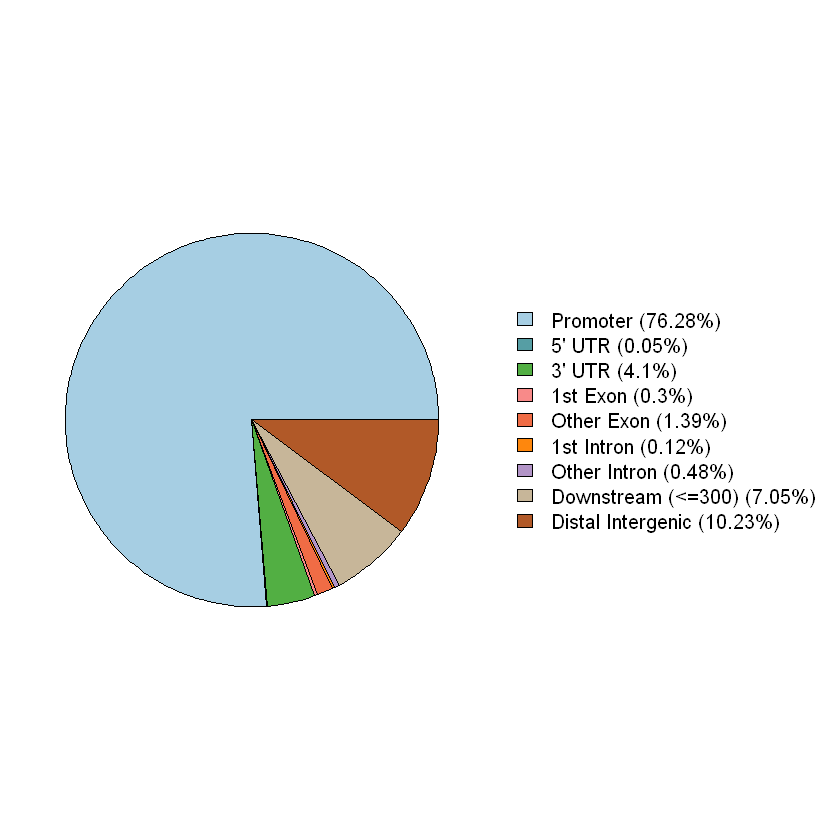

In [23]:
plotAnnoPie(peakanno)

El factor de transcripción LEC1 se une en un 76,28% al promotor, teniendo en cuenta que el promotor es de 1000pb aguas arriba y aguas abajo al TSS. Se pueden observar uniones a otras regiones, destacando las regiones distales intergénicas, que son regiones a las que, típicamente, no se unen los factores de transcripción. Puede tratarse de una unión inespecífica o una regulación trans. Esto se podría comprobar cambiando la longitud del promotor. Se puede observar que estamos ante un factor de transcripción que se une con bastante probabilidad a los promotores de los genes regulados.

*AnnotatePeak* calcula la distancia desde el pico (sitio de unión) hasta el TSS del gen más cercano. Otro tipo de gráfico es plotDistToTSS para calcular el porcentaje de sitios de unión aguas arriba y aguas abajo del TSS de los genes más cercanos, y visualizar la distribución. 

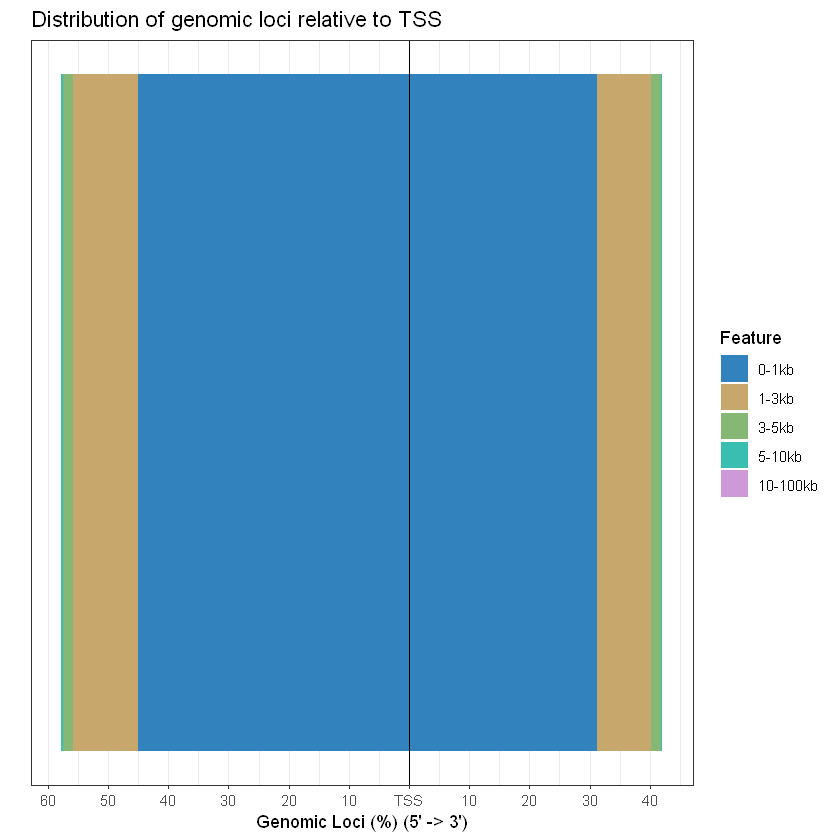

In [16]:
plotDistToTSS(peakanno,
              title="Distribution of genomic loci relative to TSS",
              ylab = "Genomic Loci (%) (5' -> 3')")

En este caso, se observa que la región está desplazada hacia la izquierda, por tanto, podemos suponer, que el factor de transcripción se une con mayor probabilidad aguas arriba de la región TSS. 

Una vez analizado cómo se comporta el factor de transcripción y a qué zonas del genoma se une, se van a estudiar los genes que son regulados principalmente por este. Es interesante estudiar la ontología génica, ya que nos da una idea sobre qué función tiene el factor de transcripción en el organismo. También, resulta de interes analizar las rutas metabólicas que se ven afectadas por dicho factor, esto se estudiará mediante la herramiento *KEGG*. Para ello, lo primero es convertir la anotación de los picos en un marco de datos y extraer únicamente los datos en los que los picos se encuentren en el promotor del gen. Dichos genes que contengan picos en su promotor se guardan en un archivo y corresponden con los genes dianas del factor de transcripción.

In [18]:
annotation_dataframe <- as.data.frame(peakanno)

target.genes <- annotation_dataframe$geneId[annotation_dataframe$annotation == "Promoter"]

write(x = target.genes,file = "results/target_genes.txt")

### Análisis de la ontología génica

El primer paso es extraer los genes que se ven regulados por el factor de transcripción, que han sido previamente guardados en un archivo *.txt*. Para ello, se utiliza la función *read.table*. Para comprobar el número total de genes regulados por LEC1 se realiza un *length* del resultado anterior.

In [19]:
gene.set <- read.table(file = "target_genes.txt", header = F, as.is = T)[[1]]
length(gene.set)

[1] 11883

Para realizar el estudio son necesarios una serie de paquetes de bioconductor. Uno de ellos es *clusterProfiler* que contiene las funciones necesarias para realizar el estudio de la ontología génica y de las rutas metabólicas. También será necesario el paquete que contiene la anotación del genoma del organismo de estudio, que es un archivo *.db*. En nuestro caso es *A. thaliana*, por lo que el paquete es *org.At.tair.db*

In [21]:
library(clusterProfiler)
library(org.At.tair.db)

clusterProfiler v3.12.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.





Con la función *enrichGO* del paquete *clusterProfiler* se conseguirá extraer los clusters de ontología génica que se ven afectados por el factor de transcripción. Algunos de los parámetros requeridos para esta función son: la lista de genes regulados por LEC1, el archivo de anotación *.db*, indicar qué ontología se quiere estudiar (procesos biológicos, funciones moleculares y/o componentes celulares), los parámetros estadísticos que asignan el umbral a partir del cual se considera afectado por el factor de transcripción (en este caso 0,05), el universo (en este caso el genoma) y, por último, el keyType que corresponde con el identificados utilizado en el mapeo del genoma. 

In [26]:
ego.BP <- enrichGO(gene = gene.set, OrgDb = org.At.tair.db, ont = "BP", pvalueCutoff = 0.05, qvalueCutoff = 0.01, universe = genes_names, keyType = "TAIR")
ego.res.BP <- as.data.frame(ego)
head(ego.res.BP)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0071396,GO:0071396,cellular response to lipid,239/7866,381/20876,1.594322e-23,2.613093e-20,1.354334e-20,AT1G01360/AT1G01720/AT1G02340/AT1G03880/AT1G05010/AT1G05680/AT1G06390/AT1G07430/AT1G07630/AT1G08720/AT1G12240/AT1G13740/AT1G14000/AT1G14920/AT1G15080/AT1G15430/AT1G17380/AT1G18080/AT1G19180/AT1G19350/AT1G20650/AT1G21970/AT1G22300/AT1G25490/AT1G27730/AT1G28370/AT1G30270/AT1G30620/AT1G32230/AT1G32640/AT1G34210/AT1G35160/AT1G42990/AT1G45249/AT1G49720/AT1G51660/AT1G52890/AT1G53300/AT1G54160/AT1G62660/AT1G62810/AT1G63720/AT1G64610/AT1G66350/AT1G66600/AT1G67030/AT1G67100/AT1G69270/AT1G71390/AT1G71830/AT1G73080/AT1G74100/AT1G74500/AT1G74670/AT1G74740/AT1G74950/AT1G75080/AT1G76650/AT1G77950/AT1G78300/AT1G79460/AT2G01570/AT2G03440/AT2G05940/AT2G17650/AT2G20010/AT2G20180/AT2G22430/AT2G22670/AT2G25170/AT2G26040/AT2G26300/AT2G26980/AT2G27310/AT2G27690/AT2G28350/AT2G30020/AT2G30040/AT2G30360/AT2G30980/AT2G32460/AT2G33150/AT2G33540/AT2G34600/AT2G36270/AT2G36830/AT2G38310/AT2G40220/AT2G41070/AT2G42580/AT2G43790/AT2G44080/AT2G46270/AT2G46500/AT2G46510/AT2G46680/AT2G47190/AT3G01090/AT3G02140/AT3G02800/AT3G03450/AT3G04580/AT3G05120/AT3G05580/AT3G05800/AT3G06750/AT3G07310/AT3G07360/AT3G07370/AT3G08030/AT3G08720/AT3G10800/AT3G11410/AT3G11440/AT3G11820/AT3G12740/AT3G14050/AT3G14090/AT3G15500/AT3G15730/AT3G16785/AT3G18040/AT3G18050/AT3G19290/AT3G19580/AT3G20210/AT3G21780/AT3G23250/AT3G24650/AT3G26090/AT3G29575/AT3G44460/AT3G48360/AT3G48760/AT3G49670/AT3G50500/AT3G52400/AT3G56850/AT3G56860/AT3G57040/AT3G57180/AT3G57450/AT3G57530/AT3G59220/AT3G61070/AT3G63060/AT3G63310/AT4G00710/AT4G01370/AT4G02380/AT4G04490/AT4G05100/AT4G08180/AT4G12720/AT4G14430/AT4G17500/AT4G17615/AT4G18010/AT4G18710/AT4G18950/AT4G21540/AT4G23450/AT4G23650/AT4G24150/AT4G24210/AT4G25030/AT4G25420/AT4G26080/AT4G27250/AT4G27410/AT4G28720/AT4G33360/AT4G33430/AT4G33950/AT4G34000/AT4G34390/AT4G34710/AT4G35230/AT4G35470/AT4G35790/AT4G36260/AT4G38740/AT4G39400/AT4G39670/AT5G01550/AT5G01810/AT5G02800/AT5G03280/AT5G05440/AT5G06100/AT5G07180/AT5G08130/AT5G10120/AT5G10450/AT5G10720/AT5G11260/AT5G13170/AT5G13220/AT5G15230/AT5G17490/AT5G20990/AT5G22260/AT5G25900/AT5G27320/AT5G27420/AT5G27520/AT5G28770/AT5G39610/AT5G42050/AT5G44120/AT5G45830/AT5G46570/AT5G47670/AT5G48170/AT5G52300/AT5G53160/AT5G54380/AT5G55120/AT5G56860/AT5G57050/AT5G58430/AT5G58670/AT5G59220/AT5G60410/AT5G61820/AT5G61850/AT5G62880/AT5G63470/AT5G63490/AT5G63910/AT5G64750/AT5G65300/AT5G65310/AT5G65430/AT5G66350/AT5G66730/AT5G66880/AT5G67080/AT5G67340,239
GO:0009611,GO:0009611,response to wounding,214/7866,335/20876,1.231131e-22,5.319315e-20,2.756936e-20,AT1G01120/AT1G01140/AT1G01470/AT1G01720/AT1G02500/AT1G04220/AT1G05200/AT1G05630/AT1G05850/AT1G06160/AT1G07135/AT1G07640/AT1G09070/AT1G09940/AT1G13930/AT1G15430/AT1G17380/AT1G17420/AT1G17840/AT1G18150/AT1G18740/AT1G19180/AT1G19660/AT1G20510/AT1G22410/AT1G22640/AT1G23710/AT1G27730/AT1G28680/AT1G30120/AT1G30135/AT1G32640/AT1G32920/AT1G35580/AT1G43160/AT1G44350/AT1G51400/AT1G51680/AT1G51760/AT1G52890/AT1G55280/AT1G55480/AT1G60710/AT1G61340/AT1G62660/AT1G65840/AT1G66760/AT1G67560/AT1G69270/AT1G70700/AT1G71100/AT1G71697/AT1G72300/AT1G72450/AT1G72520/AT1G72920/AT1G73080/AT1G73500/AT1G74020/AT1G74100/AT1G74950/AT1G76490/AT1G76650/AT1G76680/AT1G78080/AT1G78680/AT1G79270/AT1G79340/AT1G79380/AT2G02220/AT2G02860/AT2G02990/AT2G05940/AT2G16900/AT2G20340/AT2G21970/AT2G22170/AT2G23810/AT2G26170/AT2G27690/AT2G28900/AT2G30020/AT2G30360/AT2G30490/AT2G30870/AT2G33150/AT2G34600/AT2G34810/AT2G38870/AT2G39650/AT2G39940/AT2G41100/AT2G44810/AT2G46270/AT2G46370/AT2G46500/AT2G46510/AT2G46520/AT2G47190/AT2G47800/AT2G47890/AT3G03990/AT3G07370/AT3G10930/AT3G11820/AT3G13790/AT3G14050/AT3G15500/AT3G16720/AT3G17860/AT3G19580/AT3G19970/AT3G21230/AT3G21780/AT3G22400/AT3G23250/AT3G23430/AT3G24550/AT3G25250/AT3G26090/AT3G44260/AT3G46620/AT3G48360/AT3G48520/AT3G50760/AT3G50930/AT3G51450/AT3

En cuanto a los procesos biológicos, al observar el marco de datos que devuleve la función *enrichGO*, se comprueba que las funciones que se encuentran principalmente reguladas por LEC1, se tratan de respuestas celulares. Estos genes *GO* que se recogen en la tabla, tienen un p.valor muy pequeño en comparación con el umbral, por lo que, se puede concluir que están muy regulados por LEC1 frente a otros genes. Las respuestas observadas con el *head* son tanto a lípidos, como estrés por herida, agua, ósmosis etc...Por tanto, podemos suponer que LEC1 está principalmente implicada en la señalización de actividades implicadas, esenciales y críticas, en el desarollo de la semilla.


Para observarlo visualmente, se pueden representar los genes regulados por LEC1 mediante las funciones *barplot* y *emaplot*. Para su representación, es necesario introducir el resultado de la función *enrichGO*, explicada anteriormente. Además, se pueden indicar el número de categorías que se pueden visualizar. En este caso, se han seleccionado las 15 actividades más reguladas por LEC1.

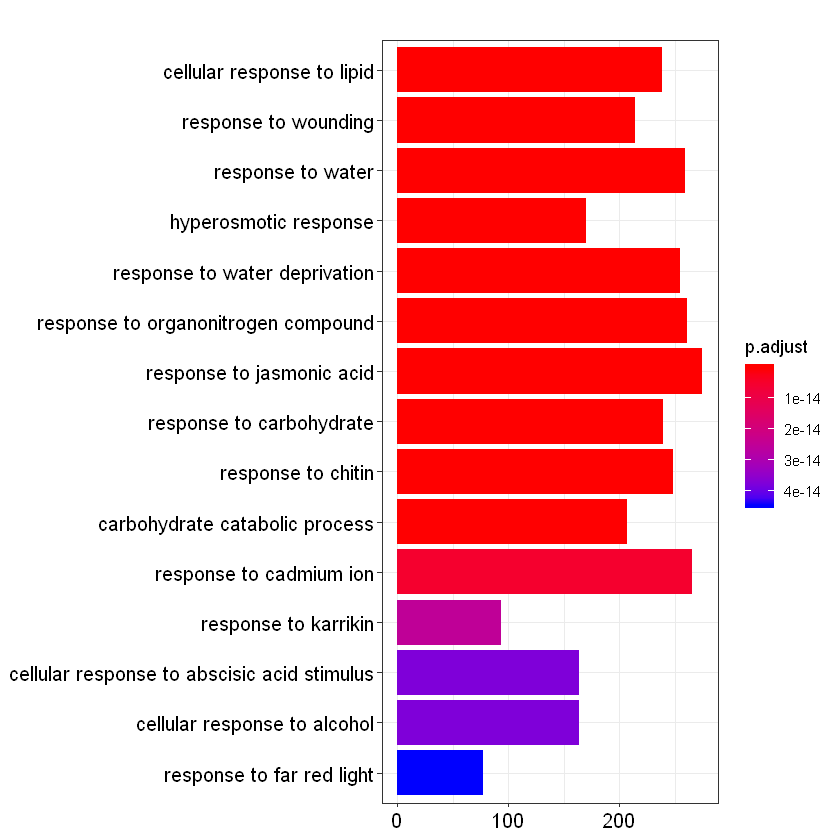

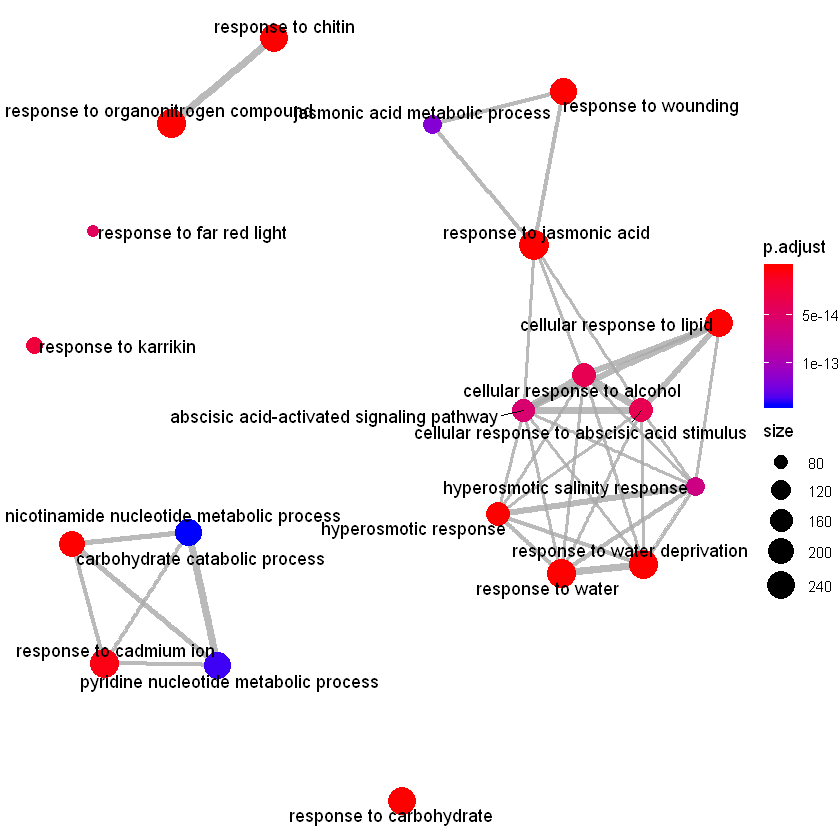

In [27]:
barplot(ego.BP, showCategory=15)
emapplot(ego.BP, showCategory = 20)

Se observa un gran bloque correspondiente a la respuesta a estímulo, destacando respuesta a diversas hormonas que pueden participar en la germinación como el ABA y otros factores abióticos que pueden afectar como respuesta a agua.

En cuanto a las funciones biológicas, se comprueba que LEC1 regula de forma significativa funciones enzimáticas como actividades quinasas, fosfatasa, transferasas, hidrolasas etc... implicadas en diferentes procesos como el crecimiento vegetal, la obtención de energía o la respuesta a estímulos. 

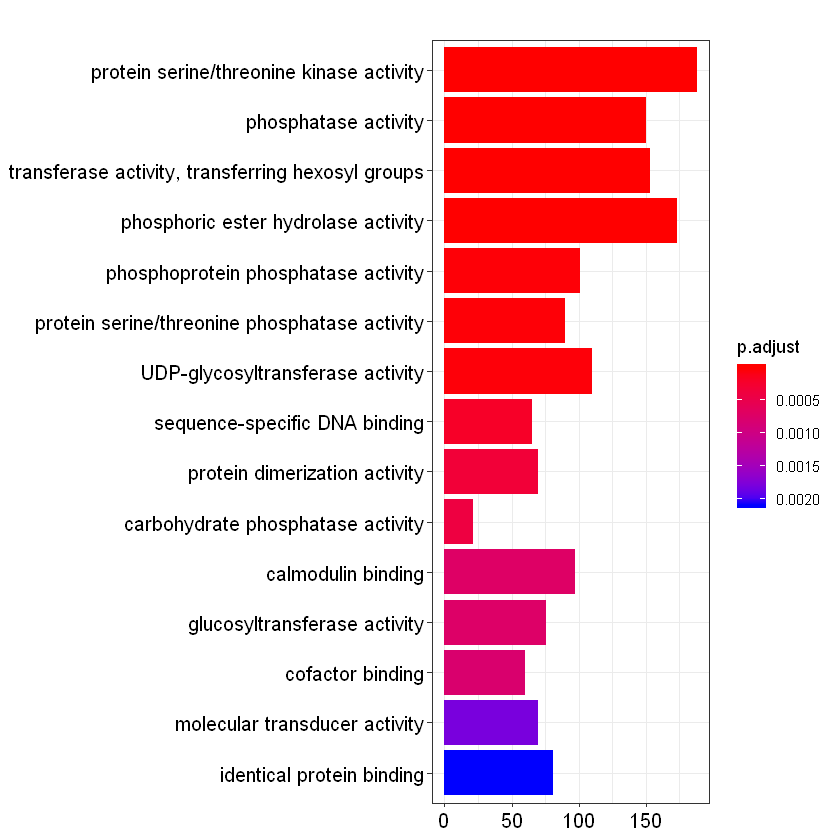

In [30]:
ego.MF <- enrichGO(gene = gene.set, OrgDb = org.At.tair.db, ont = "MF", pvalueCutoff = 0.05, qvalueCutoff = 0.01, universe = genes_names, keyType = "TAIR")
ego.res.MF <- as.data.frame(ego)
barplot(ego.MF, showCategory=15)

### Análisis de las rutas KEGG

Un vez estudiados los procesos biológicos regulados por LEC1, se pueden conocer las rutas en las que está implicado LEC1. Para ello, es necesario crear un data.frame mediante el uso de *enrichKEGG* que lee los genes regulados por LEC1, además del organismo (*A.thaliana*) y el universo utilizado, en este caso, el genoma completo. 

In [31]:
kk <- enrichKEGG(gene = gene.set, organism = "ath", universe = genes_names)
kk.res <- as.data.frame(kk)
head(kk.res)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
ath04075,ath04075,Plant hormone signal transduction,159/1985,273/4854,2.080216e-09,2.350644e-07,1.795555e-07,AT1G01360/AT1G04100/AT1G04240/AT1G04250/AT1G04310/AT1G04550/AT1G07430/AT1G08320/AT1G10470/AT1G10940/AT1G14920/AT1G15580/AT1G16510/AT1G17380/AT1G17550/AT1G19050/AT1G19180/AT1G19350/AT1G19830/AT1G19840/AT1G19850/AT1G22070/AT1G28130/AT1G32640/AT1G45249/AT1G49190/AT1G49720/AT1G51660/AT1G51950/AT1G59940/AT1G60940/AT1G63500/AT1G66350/AT1G70700/AT1G72450/AT1G72770/AT1G74950/AT1G75080/AT1G75580/AT1G75590/AT1G77690/AT1G78290/AT2G01570/AT2G01830/AT2G16580/AT2G22670/AT2G23170/AT2G25490/AT2G26040/AT2G33310/AT2G33860/AT2G36270/AT2G38120/AT2G38310/AT2G39940/AT2G40330/AT2G40670/AT2G40940/AT2G41070/AT2G41310/AT2G41370/AT2G43010/AT2G43790/AT2G45210/AT2G46370/AT2G46690/AT2G46990/AT3G03450/AT3G04580/AT3G04730/AT3G05120/AT3G11410/AT3G12250/AT3G12830/AT3G15540/AT3G16360/AT3G16500/AT3G16857/AT3G17860/AT3G19290/AT3G19690/AT3G20770/AT3G21510/AT3G23030/AT3G23150/AT3G29350/AT3G44460/AT3G50070/AT3G50500/AT3G56850/AT3G57040/AT3G57130/AT3G60690/AT3G61900/AT3G62100/AT3G62980/AT4G00710/AT4G01026/AT4G12410/AT4G14550/AT4G18620/AT4G18710/AT4G24210/AT4G26080/AT4G27260/AT4G29080/AT4G31320/AT4G31920/AT4G33430/AT4G33950/AT4G34000/AT4G34160/AT4G34760/AT4G34790/AT4G34800/AT4G34810/AT4G35230/AT4G37390/AT4G38825/AT4G38850/AT4G39400/AT4G40010/AT5G01240/AT5G03280/AT5G03730/AT5G05440/AT5G06839/AT5G08590/AT5G10120/AT5G10990/AT5G13220/AT5G13320/AT5G13360/AT5G13370/AT5G17490/AT5G20810/AT5G27320/AT5G39340/AT5G42750/AT5G43700/AT5G44080/AT5G45110/AT5G45860/AT5G45870/AT5G46570/AT5G47220/AT5G51760/AT5G53160/AT5G54510/AT5G57050/AT5G57560/AT5G58080/AT5G59220/AT5G63650/AT5G65100/AT5G65210/AT5G65670/AT5G66880/AT5G67260,159
ath01200,ath01200,Carbon metabolism,156/1985,271/4854,9.338576e-09,5.276296e-07,4.030333e-07,AT1G01090/AT1G04410/AT1G06310/AT1G09780/AT1G12230/AT1G12900/AT1G13440/AT1G13700/AT1G16300/AT1G17290/AT1G17650/AT1G18640/AT1G20620/AT1G22170/AT1G22430/AT1G23310/AT1G24280/AT1G30120/AT1G32060/AT1G32380/AT1G32440/AT1G32470/AT1G34430/AT1G36370/AT1G42970/AT1G43670/AT1G48430/AT1G50460/AT1G50480/AT1G53240/AT1G53310/AT1G54220/AT1G63290/AT1G65930/AT1G67090/AT1G70580/AT1G71100/AT1G78050/AT1G79530/AT1G79550/AT1G79750/AT1G80380/AT2G01140/AT2G05710/AT2G13360/AT2G14170/AT2G16790/AT2G17130/AT2G19860/AT2G19900/AT2G20420/AT2G21170/AT2G21330/AT2G22480/AT2G26080/AT2G34590/AT2G35390/AT2G36460/AT2G36530/AT2G41530/AT2G42600/AT2G42790/AT2G44350/AT2G45290/AT3G01850/AT3G02360/AT3G04120/AT3G04940/AT3G08590/AT3G09810/AT3G12780/AT3G13110/AT3G13930/AT3G14150/AT3G16910/AT3G16950/AT3G17770/AT3G20040/AT3G21720/AT3G25530/AT3G26650/AT3G27380/AT3G49160/AT3G51840/AT3G52930/AT3G52990/AT3G54050/AT3G55410/AT3G58740/AT3G58750/AT3G59760/AT3G60100/AT3G60510/AT3G60750/AT3G61440/AT4G00570/AT4G14880/AT4G15530/AT4G16155/AT4G16760/AT4G20930/AT4G24620/AT4G26520/AT4G26910/AT4G26970/AT4G29130/AT4G29220/AT4G32210/AT4G32840/AT4G33010/AT4G34200/AT4G35090/AT4G35640/AT4G35830/AT4G37550/AT4G37840/AT4G37870/AT4G37930/AT4G38970/AT5G03690/AT5G03860/AT5G07440/AT5G08300/AT5G08570/AT5G09660/AT5G11670/AT5G13110/AT5G14780/AT5G15530/AT5G16390/AT5G19550/AT5G24400/AT5G35360/AT5G35790/AT5G36790/AT5G36880/AT5G38410/AT5G38420/AT5G42740/AT5G43330/AT5G43940/AT5G47720/AT5G47760/AT5G47810/AT5G48230/AT5G55070/AT5G56350/AT5G56630/AT5G56760/AT5G58330/AT5G61410/AT5G63680/AT5G65110/AT5G65165/AT5G65690/AT5G65940,156
ath00196,ath00196,Photosynthesis - antenna proteins,20/1985,22/4854,1.403486e-06,5.286466e-05,4.038101e-05,AT1G15820/AT1G19150/AT1G29920/AT1G29930/AT1G45474/AT1G61520/AT1G76570/AT2G05070/AT2G05100/AT2G34420/AT2G34430/AT2G40100/AT3G08940/AT3G27690/AT3G47470/AT3G54890/AT3G61470/AT4G10340/AT5G01530/AT5G54270,20
ath00710,ath00710,Carbon fixation in photosynthetic organisms,47/1985,68/4854,2.036424e-06,5.752898e-05,4.394389e-05,AT1G04410/AT1G12900/AT1G13440/AT1G16300/AT1G17290/AT1G23310/AT1G32060/AT1G42970/AT1G4367

En la tabla anterior, se recogen las rutas metabólicas reguladas por LEC1. La principal ruta y más importante, es la transducción hormonal, que concuerda, con los genes regulados mencionados anteriormente. Como ya se mencionó, y se detallará más adelante, debido a que LEC1 es un factor de transcripción implicado en el desarrollo del embrión, todo el proceso de transducción de señales, por ejemplo, mediante hormonas, es esencial para el correcto desarrollo y posterior germinación.

Para el análisis de las ruts KEGG se utilizará el paquete *pathview*. Este paquete nos permite generar imágenes ilustrativas sobre las rutas afectadas por el factor de transcripción. Para ello, hay que generar una lista que contenga todos los genes del genoma de *A. thaliana* y asociados a cada uno de ellos, un 0 si no está regulado por LEC1 y un 1 si sí lo está. 

In [33]:
library("pathview")

my.universe <- rep(0,length(genes_names))
names(my.universe) <- genes_names
my.universe[gene.set] <- 1
head(my.universe)

Loading required package: org.Hs.eg.db



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



AT1G01010 AT1G01020 AT1G01030 AT1G01040 AT1G01046 AT1G01050 
        1         0         0         1         0         1

In [37]:
my.first.pathway <- pathview(gene.data = my.universe, pathway.id = "ath00196", species = "ath", gene.idtype = "TAIR")
my.second.pathway <- pathview(gene.data = my.universe, pathway.id = "ath04075", species = "ath", gene.idtype = "TAIR")

'select()' returned 1:1 mapping between keys and columns



[1] "Note: 6884 of 33602 unique input IDs unmapped."


Info: Getting gene ID data from KEGG...

Info: Done with data retrieval!

Info: Working in directory C:/Users/ferna/Desktop/INFORMÁTICA/tarea1

Info: Writing image file ath00196.pathview.png

'select()' returned 1:1 mapping between keys and columns



[1] "Note: 6884 of 33602 unique input IDs unmapped."


Info: Getting gene ID data from KEGG...

Info: Done with data retrieval!

Info: Downloading xml files for ath04075, 1/1 pathways..

Info: Downloading png files for ath04075, 1/1 pathways..

Info: Working in directory C:/Users/ferna/Desktop/INFORMÁTICA/tarea1

Info: Writing image file ath04075.pathview.png

Info: some node width is different from others, and hence adjusted!



Una de las rutas que se ven afectadas por el factor de transcripción LEC1 es la ruta *ath00196*, es decir, la ruta de la fotosíntesis. La herramienta *pathview* nos proporciona la siguiente imagen: 

<img src="images/kegg.png">

En esta imagen se ve como LEC1 interviene en la síntesis de prácticamente todas las proteínas LHCB y LHCA (*LIGHT-HARVESTING CHLOROPHYLL A/B-BINDING PROTEIN*) de forma directa o indirecta. Estas proteínas son esenciales para que se dé correctamente la fotosíntesis y para el correcto desarrollo de los fotosistemas.

Otra de las rutas afectadas por LEC1 es la *ath04075*. Es decir,la transducción de señales hormonales. La herramienta pathview nos proporciona la siguiente imagen:

<img src="images/ath04075.png" alt="Drawing" width= "600"/>

En este caso, se puede comprobar como LEC1 se encarga de regular la síntesis y por tanto, la actividad, de enzimas implicadas en la transducción de las señales de hormonas esenciales para el desarrollo vegetal como la auxina, citoquina, giberelina y el ácido abcísico.

### Análisis de los motivos de unión al genoma mediante la herramienta HOMER

Para completar el estudio de un factor de transcripción, además de estudiar qué genes regula, en que procesos biológicos inteviene y que rutas metabólicas modula, es importante estudiar cuáles son sus dianas en el genoma. Un factor de transcripción necesita de unas dianas o una serie de nucleótidos que reconoce en cis para unirse al promotor y regular la expresión génica. A esta secuencia de nucleótidos a la que se suele unir el factor de transcripción se le denomina motivo.
    

La herramienta *HOMER* (Hypergeometric Optimization of Motif EnRichment) permite un estudio de estos motivos de unión al ADN por parte del factor de transcripción. La herramienta *HOMER* tiene muchas aplicaciones y opciones, pero el objetivo es encontrar motivos enriquecidos en regiones genómicas, por lo que se utiliza la función *findMotifsGenome.pl* de la siguiente forma: 

    findMotifsGenome.pl <peak/BED file> < genome > < output directory > -size 250

Uno de los parámetros más importantes es el denominado *size*. Este parámetro indica a qué distancia del TSS va a buscar el algoritmo un motivo, por ejemplo, si se usa *- size 250* el algoritmo buscará motivos enriquecidos a 250 pb aguas abajo y aguas arriba del TSS. En este caso, se realizó un análisis seleccionando una búsqueda de motivos entorno a 50 pb y en torno a 250 pb para observar las posibles variaciones de los motivos enriquecidos. 

Hay que tener en cuenta que cuando mayor sea la letra del nucleótido, mayor será la probabilidad de encontrar a ese nucleótido en la diana del factor de transcripción.</div>

<img src="images/homer1.png">

En el resultado para 250 pb se observa una clara afinidad por la secuencia -CACGTG- que aparece en 6 de los 7 motivos que se observan en la imagen, flanqueadas por distintas pares de bases. Otro motivo que aparece con un p.valor muy pequeño es la diana -ACGTG- en la posición 5. 

<img src="images/homer2.png">

En el resultado para 50 pb se observa muchísima más variedad y confirma la importancia del valor al que se le da al parámetro *size*. En este caso, parece ser que seleccionar un tamaño de búsqueda de 250 pb da información más clara, pero en este caso hay que destacar el motivo número 2, donde aparece la diana -CCAAT-. Los desarrolladores de este software recomiendan realizar una búsqueda de motivos a 50/75 pb y a 200 pb.

## CONCLUSIONES

### LEC1 es clave en la fase de maduración BCOT regulando multitud de procesos biológicos

Como ya se ha mencionado en la introducción, en este proyecto, se está comprobando en la regulación de qué genes está implicado LEC1 durante el desarrollo embrionario, en este caso, en la fase en la cual el cotiledón todavía está doblado (BCOT). 
Durante la fase de maduración BCOT, la proliferación celular y la morfogénesis se detienen, las macromoléculas de almacenamiento, como los lípidos y las proteínas, se acumulan en cantidades masivas y se secuestran en orgánulos, y el embrión adquiere la capacidad de resistir la desecación. Al final del desarrollo de la semilla, el embrión y el endospermo se inactivan metabólicamente, y permanecen así hasta que la semilla germine. La hipótesis inicial es que LEC1 regula procesos implicados en la fase de maduración BCOT, por tanto, debe regular las actividades mencionadas. Para comprobarlo, se observan los términos de ontología génica.

En primer lugar, el término GO regulado con mayor significancia en la respuesta celular a lípidos. Por tanto, LEC1 de forma directa o indirecta responde a los lípidos, en este caso, permitiendo su acumulación de forma masiva. Esto se debe a que, para la germinación, es necesario obtener nutrientes que permitan a las células proliferar y elongar, siendo las sustancias de reserva son de real importancia. Además, en el artículo seleccionado, para comprobar la implicación del factor en cuanto a la acumulación de lípidos, realizaron una mutación de pérdida de función del gen que codifica para LEC1. Comprobaron que estas semillas tenían problemas a la hora de acumular proteínas y lípidos, y por tanto, dichas semillas no podían germinar. Por tanto, los análisis de Chip-seq en la fase BCOT y la mutación del factor de transcripción coinciden y demuestran que la hipótesis inicial es cierta.

Por otra parte, como se observa en los términos GO y en las rutas KEGG, otros grupos de genes regulados por LEC1 están, por ejemplo, implicados en la respuesta a diferentes estreses como a heridas, agua, medio hiperosmótico... Esto, una vez más, coincide con el proceso de maduración de la semilla, donde esta tiene que hacerse resistente a la desecación. La tolerancia a la desecación en organismos fotosintéticos es una característica corriente en algunos órganos y estructuras especiales, frecuentemente relacionados con la dispersión y la reproducción. Esta tolerancia está limitada solamente a sus semillas, que pueden desecarse para pasar el invierno en dormición y germinar en primavera. Esto, además, se relaciona con otro de los términos GO recogidos en la gráfica, la respuesta a ácido abscísico. El ABA se requiere para el control “fino” del crecimiento y desarrollo en condiciones normales sin estrés. Es especialmente importante en procesos que suceden en la semilla, como son la dormición y la maduración del embrión. La dormición de la semilla permite retrasar su germinación hasta que las condiciones del medio circundante son las óptimas para la supervivencia de la siguiente generación.

El ABA participa directamente en el proceso de desecación, ya que es capaz de inducir la síntesis de proteínas LEA, que retienen agua y protegen a las membranas y, en consecuencia, proporcionar a la semilla tolerancia a la desecación. Por tanto, tanto la respuesta a agua como a ABA, están implicadas en el proceso de desecación, esencial en el desarrollo de la semilla. Además, las respuesta a ácido jasmónico, quitina o a heridas, son necesarias para la prevalencia de la viabilidad de las semillas, para su posterior germinación. Por tanto, con estos datos se vuelve a afirmar la hipótesis inicial: LEC1 está implicado en la dormancia de la semilla, esencial es su maduración, de forma directa o indirecta (respondiendo a ABA).
En cuanto a las funciones moleculares, se ha comprobado como LEC1 está implicado en la regulación de la actividad de diferentes enzimas, como es el caso de las proteínas serina/treonina quinasa, que tiene el menor p.valor y por tanto, está muy regulado por LEC1. Estas enzimas están implicadas en muchos procesos, algunos de los más destacados concuerdan con las funciones de LEC1, como por ejemplo, la regulación positiva de la vía de señalización del ABA, que como ya se ha explicado, es una hormona esencial en la maduración del embrión.

Otra de las rutas en las que está implicado este factor de transcripción es en la fotosíntesis. La participación de LEC1 en la regulación directa de los genes necesarios para la fotosíntesis y la biogénesis de cloroplastos en la fase de maduración es coherente con su papel como regulador central del desarrollo de semillas. Se han identificado cloroplastos funcionales en embriones de *Arabidopsis*. La actividad fotosintética en semillas oleaginosas, como *Arabidopsis*, desempeña un papel principal en la prevención de la anoxia a través de la generación de oxígeno en los tejidos internos y mejora la eficiencia de conversión de carbono al reciclar el CO2 generado a partir de la biosíntesis de ácidos grasos. Por lo tanto, LEC1 promueve la fotosíntesis y, por consiguiente, la biosíntesis de ácidos grasos en semillas oleaginosas, que ocurre durante la fase de maduración. Esto permite explicar por qué LEC1 regula esta ruta. 

Además, se recogen otras rutas relacionadas con el metabolismo reguladas por LEC1: metabolismo del carbono, glucólisis/glucogénesis, síntesis de sacarosa y almidón. Esto, una vez más, está relacionado con la necesidad de sintetizar sustancias de reserva durante la fase de maduración para posteriormente obtener le energía necesaria para la germinación.


### LEC1 participa en la regulación de otros factores de transcripción

Una posible explicación para que LEC1 active directamente genes implicados en rutas tan diferentes es que este puede interactuar con diferentes FT para activar distintos conjuntos de genes. Estos FT pueden están regulados temporalmente, dependiendo de en la fase de maduración en la que se encuentre la semilla. LEC1 es una subunidad del complejo NF-Y, otros estudios en plantas han demostrado que los complejos NF-Y interactúan con una serie de FT distintos para regular la transcripción del gen diana sinérgicamente. Además, se ha demostrado que LEC1 interactúa con NF-YC2 y bZIP67 para activar genes de maduración. PONER REFERENCIAS. En la visualización de picos con *IGV* se destaca cómo existe un pico en el promotor de BBM, el cual es un factor de transcripción que regula multitud de genes embrionarios. 

Estas hipótesis cobran fuerza con los resultados obtenidos por la herramienta *HOMER*. La diana -CCAAT- encontrada en la búsqueda a 50 pb corresponde con una diana típica de los complejos NF-Y. Aun así, al ampliar la búsqueda de motivos enriquecidos a 250 pb de distancia respecto al TSS, aparecía en 7 de los 8 motivos con más significancia una secuencia -CACGTG-. Esta secuencia corresponde con una caja G (G-box) al cual se une bZIP67. Como se ha mencionado anteriormente, LEC1 interactúa con bZIP67, lo que explicaría dichos motivos enriquecidos. 

Con esta hipótesis se explicaría por qué aparecen casi un tercio de los genes de *A. thaliana* como genes dianas de LEC1. Realmente es complicado que un solo factor de transcripción regule a un tercio del genoma, pero esto se entiende si este factor de transcripción regula a otros factores, entrando una regulación más compleja, lo cual sería lógico. 

En conclusión, el estudio de genes regulados por LEC1 ha demostrado su papel en la regulación de distintos conjuntos de genes en la etapa embrionaria BCOT. Además de confirmar el papel de LEC1 en el control de la fase de maduración, se comprueba el papel directo de LEC1 en el control de la fotosíntesis y el desarrollo de cloroplastos, además de control hormonal, acumulación de lípidos y muchas más rutas. La identificación de funciones tan dispares reguladas por el FT sugiere que LEC1 puede regular diversos conjuntos de genes diana al interactuar con diferentes FT. La conservación de los procesos de desarrollo y las redes reguladoras de genes controlados por LEC1 es consistente con la idea de que LEC1 es un importante regulador del desarrollo de semillas.


## BIBLIOGRAFÍA

* Bates D, Carey V et al. Yang, J. Zhang. Bioconductor (Web Site), http://www.bioconductor.org/, 2002.
* R Core Team (2019). R: A language and environment for statistical computing. R Foundation for
  Statistical Computing, Vienna, Austria. URL https://www.R-project.org/.
* Guangchuang Yu, Li-Gen Wang, and Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP
  peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383
* Marc Carlson and Bioconductor Package Maintainer (2015). TxDb.Athaliana.BioMart.plantsmart28:
  Annotation package for TxDb object(s). R package version 3.2.2.
* Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He. clusterProfiler: an R package for
  comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology 2012,
  16(5):284-287
* Marc Carlson (2019). org.At.tair.db: Genome wide annotation for Arabidopsis. R package version
  3.8.2.
* Luo, W. and Brouwer C., Pathview: an R/Bioconductor package for pathway-based data integration
  and visualization. Bioinformatics, 2013, 29(14): 1830-1831, doi: 10.1093/bioinformatics/btt285
* Pelletier JM, Kwong RW, Park S, et al. LEC1 sequentially regulates the transcription of genes involved in diverse developmental processes during seed development. Proc Natl Acad Sci U S A. 2017;114(32):E6710–E6719.doi:10.1073/pnas.1707957114